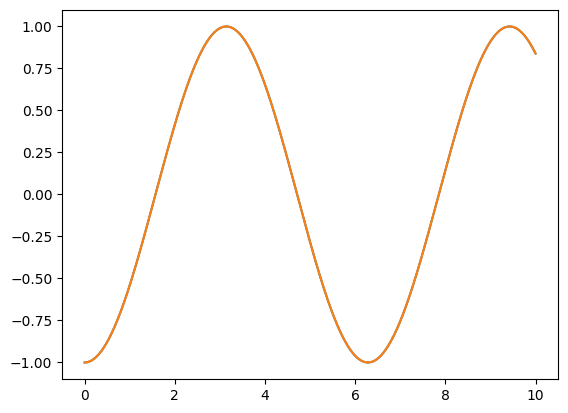

In [59]:
import numpy as np
import matplotlib.pyplot as plt

def rk4(f, y0, t0, t_end, h):
    """
    Solves an ODE using the fourth-order Runge-Kutta method.
    """
    t_values = np.arange(t0, t_end + h, h) # initialize t
    y_values = np.zeros((len(t_values),) + np.shape(y0)) # initialize y
    
    y_values[0] = y0 # set y_0
    
    # loop (step forward)
    for i in range(len(t_values) - 1):
        t = t_values[i]
        y = y_values[i]
        
        s1 = h * f(t, y) # slope 1
        s2 = h * f(t + h / 2, y + s1 / 2) # slope 2
        s3 = h * f(t + h / 2, y + s2 / 2) # slope 3
        s4 = h * f(t + h, y + s3) # slope 4
        
        y_values[i + 1] = y + (s1 + 2 * s2 + 2 * s3 + s4) / 6 # calculate next y(t)
    
    return t_values, y_values

# Example usage
def example_function(t, y):
    return np.sin(t)

t0, t_end, y0, h = 0, 10, -1, 0.01
t_values, y_values = rk4(example_function, y0, t0, t_end, h)


plt.figure()
plt.plot(t_values,y_values)
plt.plot(t_values,-np.cos(t_values))
plt.show()

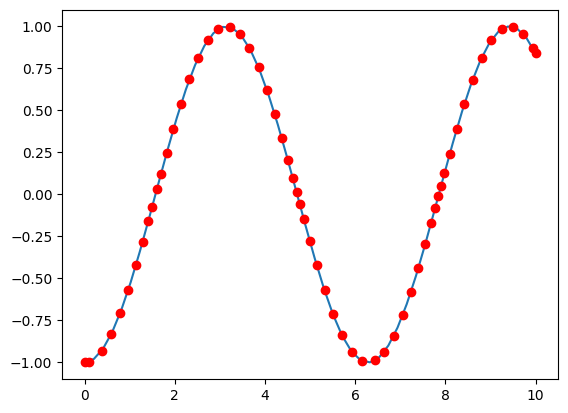

In [74]:
import numpy as np
import matplotlib.pyplot as plt

def rk4_fehlberg_adaptive(f, y0, t0, t_end, h_init, rtol=1e-8, atol=1e-12):
    """
    Solves an ODE using the adaptive Runge-Kutta 4(5) Fehlberg method.
    
    Parameters:
    f: function - The derivative function dy/dt = f(t, y)
    y0: float or ndarray - Initial value
    t0: float - Initial time
    t_end: float - Final time
    h_init: float - Initial step size
    
    Returns:
    t_values: list - List of time values
    y_values: list - List of solution values
    """
    # Fehlberg coefficients
    c = np.array([0, 1/4, 3/8, 12/13, 1, 1/2])
    a = np.array([
        [0, 0, 0, 0, 0],
        [1/4, 0, 0, 0, 0],
        [3/32, 9/32, 0, 0, 0],
        [1932/2197, -7200/2197, 7296/2197, 0, 0],
        [439/216, -8, 3680/513, -845/4104, 0],
        [-8/27, 2, -3544/2565, 1859/4104, -11/40]
    ])
    b4 = np.array([25/216, 0, 1408/2565, 2197/4104, -1/5, 0])  # Fourth-order estimate
    b5 = np.array([16/135, 0, 6656/12825, 28561/56430, -9/50, 2/55])  # Fifth-order estimate
    
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    h = h_init
    
    while t < t_end:
        if t + h > t_end:
            h = t_end - t  # Adjust step size for the last step
        
        k = np.zeros((6,) + np.shape(y0))
        for i in range(6):
            ti = t + c[i] * h
            yi = y + h * np.dot(a[i, :i], k[:i])
            k[i] = f(ti, yi)
        
        y4 = y + h * np.dot(b4, k)
        y5 = y + h * np.dot(b5, k)
        error = np.linalg.norm(y5 - y4)  # Compute error estimate
        tol = rtol * np.max(np.abs(y5) + atol)
        if error < tol:
            t += h
            y = y5  # Use the fifth-order solution
            t_values.append(t)
            y_values.append(y)
        
        # Adjust step size based on error
        h *= 0.9 * (tol / (error + 1e-10))**(1/4)  # Safety factor 0.9 to prevent oscillations
    
    return np.array(t_values), np.array(y_values)

# Example usage
def example_function(t, y):
    return np.sin(t)

t0, t_end, y0, h = 0, 10, -1, 0.1
t_values, y_values = rk4_fehlberg_adaptive(example_function, y0, t0, t_end, h)


plt.figure()
plt.plot(np.linspace(t0,t_end),-np.cos(np.linspace(t0,t_end)))
plt.plot(t_values,y_values,'ro')
plt.show()


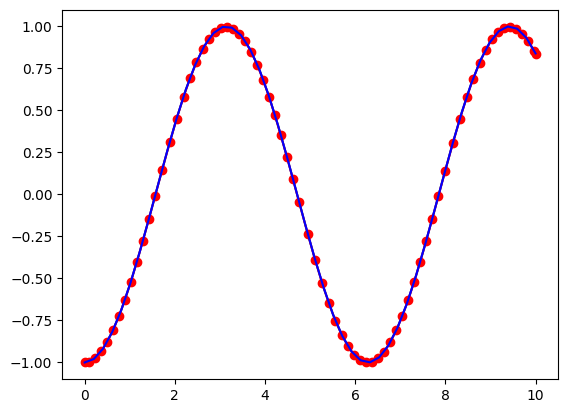

In [73]:
import numpy as np

def euler_step(f,y,h,t):
    return y + h * f(t, y)

def rk2_step(f,y,h,t):
        k1 = h * f(t, y)
        k2 = h * f(t + h, y + k1)
        return y + 0.5 * (k1 + k2)


def adaptive_step_rk2_euler(f, y0, t0, t_end, h_init, rtol = 1e-2, atol=1e-3):
    """
    Solves an ODE using adaptive step size with RK2 and Euler methods.

    Parameters:
    f: function - The derivative function dy/dt = f(t, y)
    y0: float or ndarray - Initial value
    t0: float - Initial time
    t_end: float - Final time
    h_init: float - Initial step size


    Returns:
    t_values: list - List of time values
    y_values: list - List of solution values
    """
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    h = h_init

    while t < t_end:
        if t + h > t_end:
            h = t_end - t  # Adjust step size for the last step

        # Euler's method (first-order approximation)
        y_euler = euler_step(f,y,h,t)

        # RK2 method (second-order approximation)
        y_rk2 = rk2_step(f,y,h,t)

        # Estimate error as the difference between RK2 and Euler's method
        error = np.abs(y_rk2 - y_euler)

        tol = rtol*np.max(np.abs(y_rk2)) + atol
        # Check if error is within tolerance
        if error < tol:
            t += h
            y = y_rk2  # Use RK2 solution
            t_values.append(t)
            y_values.append(y)

        # Adjust step size based on error estimate
        h *= 0.9 * (tol / (error + 1e-10))**(1/2)  # Square root because of Euler's error behavior

    return np.array(t_values), np.array(y_values)


# Example usage
def example_function(t, y):
    return np.sin(t)

t0, t_end, y0, h_init = 0, 10, -1, 0.1
t_values, y_values = adaptive_step_rk2_euler(example_function, y0, t0, t_end, h_init)

plt.figure()
plt.plot(np.linspace(t0,t_end),-np.cos(np.linspace(t0,t_end)))
plt.plot(t_values,y_values,'ro-')
plt.plot(np.linspace(t0,t_end),-np.cos(np.linspace(t0,t_end)),'b-')
plt.show()

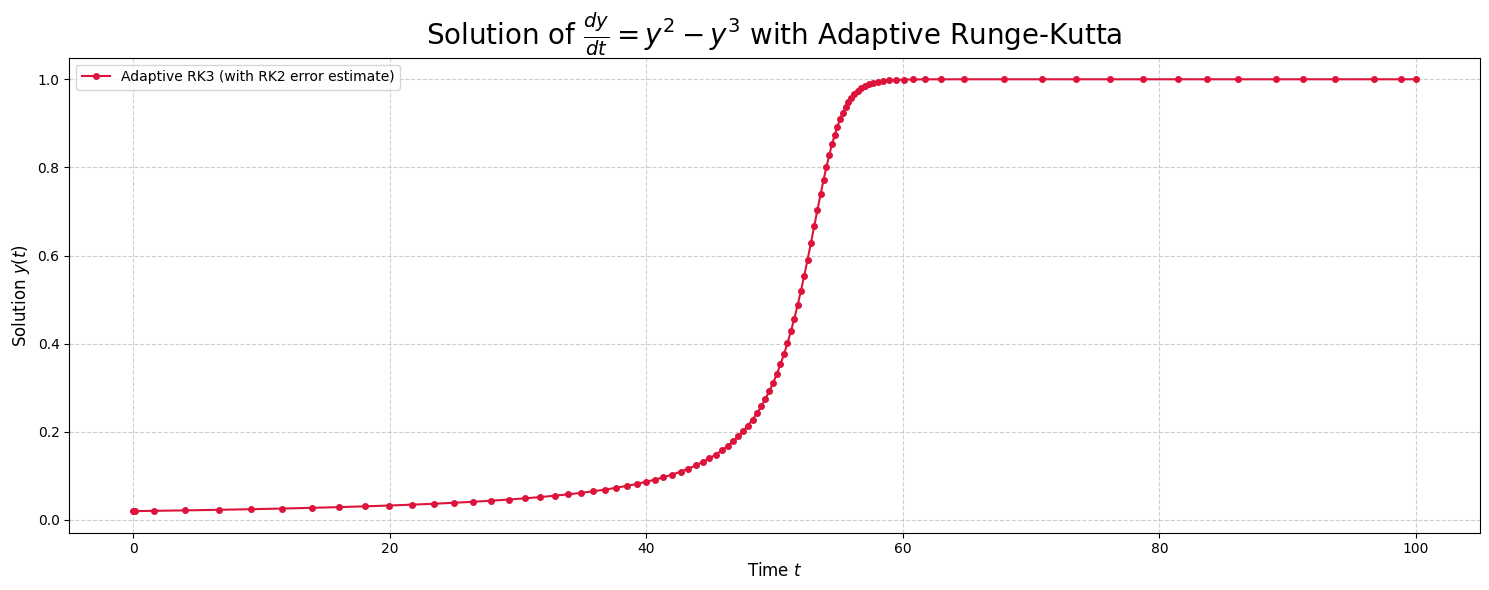

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def rk2_step(f,y,h,t):
        k1 = h * f(t, y)
        k2 = h * f(t + h, y + k1)
        return y + 0.5 * (k1 + k2)

def rk3_step(f, y, h, t):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + h, y - k1 + 2 * k2)
    return y + (1/6) * (k1 + 4 * k2 + k3)

def adaptive_step(f, y0, t0, t_end, h_init, rtol = 1e-4, atol=1e-6):
    """
    Solves an ODE using adaptive step size with RK2 and Euler methods.

    Parameters:
    f: function - The derivative function dy/dt = f(t, y)
    y0: float or ndarray - Initial value
    t0: float - Initial time
    t_end: float - Final time
    h_init: float - Initial step size


    Returns:
    t_values: list - List of time values
    y_values: list - List of solution values
    """
    t_values = [t0]
    y_values = [y0]
    t = t0
    y = y0
    h = h_init

    while t < t_end:
        if t + h > t_end:
            h = t_end - t  # Adjust step size for the last step

        # Euler's method (first-order approximation)
        y_rk3 = rk3_step(f,y,h,t)

        # RK2 method (second-order approximation)
        y_rk2 = rk2_step(f,y,h,t)

        # Estimate error as the difference between RK2 and Euler's method
        error = np.abs(y_rk3 - y_rk2)

        tol = rtol*np.max(np.abs(y_rk2)) + atol
        # Check if error is within tolerance
        if error < tol:
            t += h
            y = y_rk3  # Use RK2 solution
            t_values.append(t)
            y_values.append(y)

        # Adjust step size based on error estimate
        h *= 0.9 * (tol / (error + 1e-10))**(1/2)  # Square root because perfermance

    return np.array(t_values), np.array(y_values)


# Example usage
def example_function(t, y):
    return y**2-y**3


delta = 0.02
t0, t_end, y0, h_init = 0, 2/delta, delta, 0.1
t_values, y_values = adaptive_step(example_function, y0, t0, t_end, h_init)

plt.figure(figsize=(15, 6), dpi=100)
plt.plot(t_values, y_values, 'o-', color='crimson', markersize=4, label='Adaptive RK3 (with RK2 error estimate)')
plt.xlabel('Time $t$', fontsize=12)
plt.ylabel('Solution $y(t)$', fontsize=12)
plt.title(r'Solution of $\frac{dy}{dt} = y^2 - y^3$ with Adaptive Runge-Kutta', fontsize=20)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()


In [33]:
y_values[-1]

0.9999956919053187